In [13]:
import pickle
import numpy as np
import pandas as pd

from keras.layers import Input, Dense
from keras.models import Model
from keras.utils import to_categorical
import matplotlib.pyplot as plt

from numpy.random import seed

from keras.utils import plot_model

from keras import regularizers

from keras.models import model_from_json
import csv
import json

from keras import models
from keras import layers
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


# Import Data

X Training set (images) shape: (11829, 28, 28, 1)
X Testset set (images) shape: (5070, 28, 28, 1)
Y Training set (images) shape: (11829, 10)


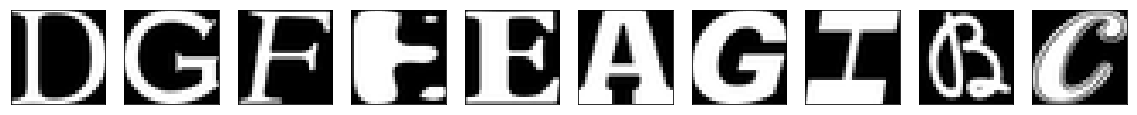

X Training set normalized (images) shape: (11829, 784)
X Testset set normalized (images) shape: (5070, 784)
Y Training set normalized (images) shape: (11829, 20)

Noisy Images


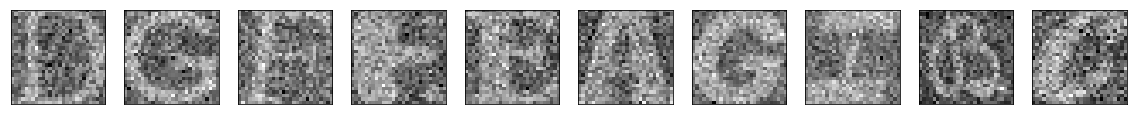

In [2]:
# Load x_test features from file
filename = "./x_test.obj"
with open(filename, 'rb') as file:  
    x_test = pickle.load(file)
    file.close()
    
# Load x_train features from file
filename = "./x_train.obj"
with open(filename, 'rb') as file:  
    x_train = pickle.load(file)
    file.close()
    
# Load y_train label from file
filename = "./y_train.obj"
with open(filename, 'rb') as file:  
    y_train = pickle.load(file)
    file.close()

#See wich data you have
print("X Training set (images) shape: {shape}".format(shape=x_train.shape))
print("X Testset set (images) shape: {shape}".format(shape=x_test.shape))
print("Y Training set (images) shape: {shape}".format(shape=y_train.shape))

#Trasform the y_train to categorical
y_train = to_categorical(y_train)

#Plot the letters
n = 10  # how many letters we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#We will normalize all values between 0 and 1 and we will flatten the 28x28 images into vectors of size 784.
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


y_train = y_train.astype('float32') / 255.
y_train = y_train.reshape((len(y_train), np.prod(y_train.shape[1:])))

#Create a training and test set with some noise to have a much more robust model
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

y_train_noisy = y_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=y_train.shape)

print("X Training set normalized (images) shape: {shape}".format(shape=x_train.shape))
print("X Testset set normalized (images) shape: {shape}".format(shape=x_test.shape))
print("Y Training set normalized (images) shape: {shape}".format(shape=y_train.shape))

print("\nNoisy Images")

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Create the network

In [21]:

#See the right disposition of the predictor
n_cols = x_train.shape[1]
n_rows = x_train.shape[0]
print("Number of rows predictors: " + str(n_rows))
print("Number of cols predictors: " + str(n_cols))

#See the right disposition of the target array
n_cols_target = x_test.shape[1]
n_rows_target = x_test.shape[0]
print("Number of rows target: " + str(n_rows_target))
print("Number of cols target: " + str(n_cols_target))

#Use and print the right class weight after the preprocessing
# class_weight = {0:ratio, 1:1-ratio}
# print("Class Weight: " + str(class_weight))

seed(42)

# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=32, activation='relu', input_shape=(n_cols,)))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=64, activation='relu'))

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=128, activation='relu'))

# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=784, activation='sigmoid'))


#Now train autoencoder to reconstruct the input images
#First, we'll configure our model to use a per-pixel binary crossentropy loss, and the Adadelta optimizer
network.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Train neural network
history = network.fit(x_train,        # Features
                        x_train,       # Target vector
                        epochs=100,    # Number of epochs
                        verbose=1,    # Print description after each epoch
                        shuffle=True, #Split the data for validation
                        batch_size=256,
                        validation_data=(x_test, x_test))


#Loss Function = CATEGORICAL CROSS ENTROPY
#Optimizer = ADAM
#Layers = RELU
#Final Output Layer = Softmax

Number of rows predictors: 11829
Number of cols predictors: 784
Number of rows target: 5070
Number of cols target: 784
Train on 11829 samples, validate on 5070 samples
Epoch 1/100
11829/11829 [==============================] - 1s 92us/step - loss: 0.6901 - acc: 0.3187 - val_loss: 0.6824 - val_acc: 0.3414
Epoch 2/100
11829/11829 [==============================] - 1s 55us/step - loss: 0.6619 - acc: 0.3675 - val_loss: 0.6395 - val_acc: 0.3856
Epoch 3/100
11829/11829 [==============================] - 1s 54us/step - loss: 0.6265 - acc: 0.3976 - val_loss: 0.6157 - val_acc: 0.4092
Epoch 4/100
11829/11829 [==============================] - 1s 54us/step - loss: 0.5987 - acc: 0.4266 - val_loss: 0.5762 - val_acc: 0.4452
Epoch 5/100
11829/11829 [==============================] - 1s 54us/step - loss: 0.5453 - acc: 0.4627 - val_loss: 0.5212 - val_acc: 0.4749
Epoch 6/100
11829/11829 [==============================] - 1s 53us/step - loss: 0.5064 - acc: 0.4814 - val_loss: 0.5173 - val_acc: 0.4701
Epoc

Epoch 59/100
11829/11829 [==============================] - 1s 55us/step - loss: 0.2560 - acc: 0.5790 - val_loss: 0.2605 - val_acc: 0.5766
Epoch 60/100
11829/11829 [==============================] - 1s 58us/step - loss: 0.2544 - acc: 0.5795 - val_loss: 0.2667 - val_acc: 0.5748
Epoch 61/100
11829/11829 [==============================] - 1s 61us/step - loss: 0.2534 - acc: 0.5796 - val_loss: 0.2565 - val_acc: 0.5780
Epoch 62/100
11829/11829 [==============================] - 1s 59us/step - loss: 0.2533 - acc: 0.5798 - val_loss: 0.2525 - val_acc: 0.5785
Epoch 63/100
11829/11829 [==============================] - 1s 58us/step - loss: 0.2515 - acc: 0.5802 - val_loss: 0.2641 - val_acc: 0.5754
Epoch 64/100
11829/11829 [==============================] - 1s 56us/step - loss: 0.2517 - acc: 0.5801 - val_loss: 0.2522 - val_acc: 0.5785
Epoch 65/100
11829/11829 [==============================] - 1s 57us/step - loss: 0.2491 - acc: 0.5807 - val_loss: 0.2550 - val_acc: 0.5779
Epoch 66/100
11829/11829 [=

# Visualize results

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_23 (Dense)             (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


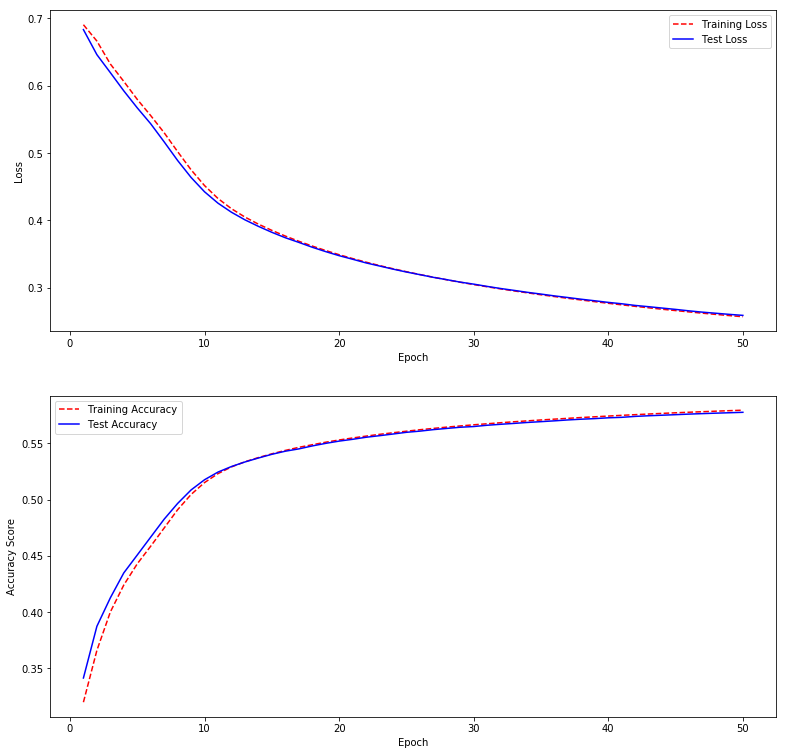

In [20]:


#Visualise the summary of the network
network.summary()

# Get training and test loss histories
training_loss = history.history['loss']
test_loss = history.history['val_loss']

# Get training and test accuracy histories
training_accuracy = history.history['acc']
test_accuracy = history.history['val_acc']

# Plot the accuracy and cost summaries 
f, (ax1, ax2) = plt.subplots(2, 1, sharex=False, figsize=(13,13))

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
ax1.plot(epoch_count, training_loss, 'r--')
ax1.plot(epoch_count, test_loss, 'b-')
ax1.legend(['Training Loss', 'Test Loss'])
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
ax2.plot(epoch_count, training_accuracy, 'r--')
ax2.plot(epoch_count, test_accuracy, 'b-')
ax2.legend(['Training Accuracy', 'Test Accuracy'])
ax2.set_ylabel('Accuracy Score')
ax1.set_xlabel('Epoch')

plt.xlabel('Epoch')
plt.show();

#Plot the model
# plot_model(network, show_shapes=True, to_file='model.png')

##TODO: Try to use Tensorboard

## Save the model

In [22]:

#Optimize hyperparameters
#https://chrisalbon.com/deep_learning/keras/tuning_neural_network_hyperparameters/

#Dropout?
#Early Stopping

#Save the model
# serialize model to JSON
model_json = network.to_json()
with open("model-normal.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
network.save_weights("model-nor.h5")
print("Saved model to disk")


Saved model to disk


# Make prediction

In [ ]:

#Show some statistics about prediction
from keras.models import model_from_json
import csv
    
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='mean_squared_logarithmic_error', # Categorical Cross-entropy
                optimizer='adam', 
                metrics=['accuracy'])

#trasform the test data for the evaluation
library = "./"
test_file = "testing_data.csv"
test_data_path = library + "/" + test_file
df_test = pd.read_csv(test_data_path)

print("Dataframe Test shape: " + str(df_test.shape))
print(df_test.head(5))

#use only usefull features and the label
df_test['MARRIAGE'].replace(0, 3, inplace = True)
df_test['EDUCATION'].replace([0, 5, 6], 4, inplace = True)

#Get only the variable that we need (prefilter)
df_test.shape

# Create scaler
scaler = preprocessing.StandardScaler()
scoreset = df_test.as_matrix()

# Transform the feature
scoreset = scaler.fit_transform(scoreset)

# make a prediction
ynew = loaded_model.predict(scoreset)

#Names of all of the features
scoreset_features = list(df_test.columns.values)
scoreset_features.insert(0, "Id")
scoreset_features.append("Prediction")
scoreset_features.append("Score")

result_list = list()

# show the inputs and predicted outputs
for i in range(len(scoreset)):
    if ynew[i][0] >= ynew[i][1]:
        result = 0
        score = ynew[i][0]
    else: 
        result = 1
        score = ynew[i][1]
    
    data_predicted = list(df_test.loc[i,:])
    data_predicted.insert(0,i)
    data_predicted.append(result)
    data_predicted.append(score)
    
    result_list.append(data_predicted)
    
    #print("X= %s\tInput=%s\tPredicted=%s\tScore= %s" % (i,scoreset[i],result,score))
    
df_result = pd.DataFrame(result_list,columns=scoreset_features)

df_result.to_csv("result.csv",sep="|")
print("File result.csv written")

